# Ejercicio SVM datos Eurocopa 2012
A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

## 1. Importa las librerias necesarias

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [4]:
%matplotlib inline

## 2. Carga los datos

In [5]:
df = pd.read_csv('./data/Euro_2012_stats_TEAM.csv')
df.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [6]:
df.index

RangeIndex(start=0, stop=16, step=1)

In [7]:
df.shape

(16, 35)

In [8]:
df.set_index('Team', drop=True, inplace=True)

In [9]:
df.head()

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Team,,,,,,,,,,,,,,,,,,,,,
Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,...,13,81.3%,41,62,2,9,0,9,9,16
Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,...,10,66.7%,25,38,8,4,0,7,7,15
England,5,11,18,50.0%,17.2%,40,0,0,0,3,...,22,88.1%,43,45,6,5,0,11,11,16
France,3,22,24,37.9%,6.5%,65,1,0,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


## 3. Obtener la matriz de correlación con TODAS las variables. ¿Hay algunas columnas que estén muy correlacionadas?

In [10]:
# 1.- Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?
df_corr = df.corr()
df_corr

,Goals,Shots on target,Shots off target,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,...,Goals conceded,Saves made,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Goals,1.000000,0.804193,0.403821,0.650109,0.200512,0.730437,0.023094,0.349330,0.838497,0.830062,...,-0.337689,0.143912,0.663876,0.483833,0.703043,0.337709,-3.580574e-01,0.727830,0.727830,0.136067
Shots on target,0.804193,1.000000,0.611185,0.886090,0.212932,0.478610,-0.229945,0.210571,0.930337,0.923242,...,-0.214415,0.085059,0.765949,0.658353,0.696263,0.544307,-3.340500e-01,0.821342,0.821342,0.249516
Shots off target,0.403821,0.611185,1.000000,0.887032,0.581655,0.126783,-0.173221,0.002284,0.624451,0.612998,...,-0.139274,0.086157,0.615058,0.434815,0.344626,0.534186,-3.377661e-01,0.544974,0.544974,0.045973
Total shots (inc. Blocked),0.650109,0.886090,0.887032,1.000000,0.400121,0.299397,-0.234668,0.125738,0.875698,0.864279,...,-0.184740,0.148269,0.766215,0.623288,0.589635,0.622268,-3.604662e-01,0.763336,0.763336,0.157812
Hit Woodwork,0.200512,0.212932,0.581655,0.400121,1.000000,-0.076923,-0.041345,0.020174,0.095882,0.073814,...,0.062541,-0.230524,0.141180,0.303987,0.113657,0.319708,-2.820513e-01,0.204511,0.204511,-0.189466
Penalty goals,0.730437,0.478610,0.126783,0.299397,-0.076923,1.000000,0.537484,-0.020174,0.545294,0.550720,...,-0.020847,0.058761,0.528185,0.114404,0.627220,0.085467,1.794872e-01,0.531727,0.531727,0.351866
Penalties not scored,0.023094,-0.229945,-0.173221,-0.234668,-0.041345,0.537484,1.000000,-0.357830,-0.169613,-0.179278,...,0.302532,0.051019,0.163643,-0.107169,0.210417,0.127603,5.374838e-01,0.084796,0.084796,0.480079
Headed goals,0.349330,0.210571,0.002284,0.125738,0.020174,-0.020174,-0.357830,1.000000,0.213073,0.200605,...,-0.344447,0.458773,0.157215,0.117445,0.188786,0.067245,-3.429623e-01,0.216077,0.216077,-0.447214
Passes,0.838497,0.930337,0.624451,0.875698,0.095882,0.545294,-0.169613,0.213073,1.000000,0.997697,...,-0.284982,0.207240,0.773382,0.549248,0.731938,0.465799,-4.002506e-01,0.800546,0.800546,0.232214
Passes completed,0.830062,0.923242,0.612998,0.864279,0.073814,0.550720,-0.179278,0.200605,0.997697,1.000000,...,-0.300837,0.184878,0.738845,0.499351,0.704802,0.420410,-4.062897e-01,0.766326,0.766326,0.213345


In [11]:
df_high_corr = df_corr[(df_corr > 0.75) | (df_corr < -0.75)  ]
df_high_corr

,Goals,Shots on target,Shots off target,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,...,Goals conceded,Saves made,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Goals,1.000000,0.804193,NaN,NaN,NaN,NaN,NaN,NaN,0.838497,0.830062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shots on target,0.804193,1.000000,NaN,0.886090,NaN,NaN,NaN,NaN,0.930337,0.923242,...,NaN,NaN,0.765949,NaN,NaN,NaN,NaN,0.821342,0.821342,NaN
Shots off target,NaN,NaN,1.000000,0.887032,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total shots (inc. Blocked),NaN,0.886090,0.887032,1.000000,NaN,NaN,NaN,NaN,0.875698,0.864279,...,NaN,NaN,0.766215,NaN,NaN,NaN,NaN,0.763336,0.763336,NaN
Hit Woodwork,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Penalty goals,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Penalties not scored,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Headed goals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Passes,0.838497,0.930337,NaN,0.875698,NaN,NaN,NaN,NaN,1.000000,0.997697,...,NaN,NaN,0.773382,NaN,NaN,NaN,NaN,0.800546,0.800546,NaN
Passes completed,0.830062,0.923242,NaN,0.864279,NaN,NaN,NaN,NaN,0.997697,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.766326,0.766326,NaN


<AxesSubplot:>

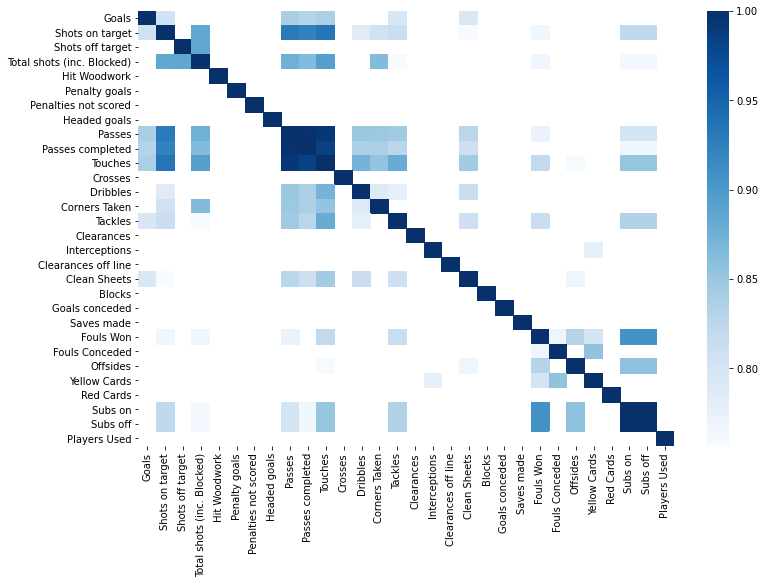

In [12]:
plt.subplots(figsize=(12,8))
sns.heatmap(df_high_corr, cmap='Blues')

In [13]:
df_high_corr.isnull().sum()

Goals                         23
Shots on target               17
Shots off target              28
Total shots (inc. Blocked)    19
Hit Woodwork                  29
Penalty goals                 29
Penalties not scored          29
Headed goals                  29
Passes                        17
Passes completed              18
Touches                       16
Crosses                       29
Dribbles                      22
Corners Taken                 23
Tackles                       18
Clearances                    29
Interceptions                 28
Clearances off line           29
Clean Sheets                  21
Blocks                        29
Goals conceded                29
Saves made                    29
Fouls Won                     19
Fouls Conceded                27
Offsides                      24
Yellow Cards                  26
Red Cards                     29
Subs on                       20
Subs off                      20
Players Used                  29
dtype: int

In [14]:
#Get best correlation between features 
best_corr_features = []
columns = []
for col in df_high_corr.columns:
    rows = list((df_high_corr[col][~(df_high_corr[col].isnull())]).index)
    for row in rows:
        if (df_high_corr.loc[row,col]) != 1.0:
                if not(row in columns):
                    columns.append(col)
                    best_corr_features.append((row,col))
                    print([row,col,df_high_corr.loc[row,col]],'\n')
    

['Shots on target', 'Goals', 0.8041927635169258] 

['Passes', 'Goals', 0.8384971612206693] 

['Passes completed', 'Goals', 0.8300615030546331] 

['Touches', 'Goals', 0.8377604563173091] 

['Tackles', 'Goals', 0.7968302264939648] 

['Clean Sheets', 'Goals', 0.7925593832261717] 

['Total shots (inc. Blocked)', 'Shots on target', 0.8860900801499829] 

['Passes', 'Shots on target', 0.9303372646441443] 

['Passes completed', 'Shots on target', 0.9232415575195931] 

['Touches', 'Shots on target', 0.9346231391147478] 

['Dribbles', 'Shots on target', 0.7870660856149914] 

['Corners Taken', 'Shots on target', 0.8033469680817479] 

['Tackles', 'Shots on target', 0.8115815730247433] 

['Clean Sheets', 'Shots on target', 0.7567153399822721] 

['Fouls Won', 'Shots on target', 0.7659485045301567] 

['Subs on', 'Shots on target', 0.821342094648945] 

['Subs off', 'Shots on target', 0.821342094648945] 

['Total shots (inc. Blocked)', 'Shots off target', 0.8870324508081447] 

['Passes', 'Total shots (

In [15]:
best_corr_features

[('Shots on target', 'Goals'),
 ('Passes', 'Goals'),
 ('Passes completed', 'Goals'),
 ('Touches', 'Goals'),
 ('Tackles', 'Goals'),
 ('Clean Sheets', 'Goals'),
 ('Total shots (inc. Blocked)', 'Shots on target'),
 ('Passes', 'Shots on target'),
 ('Passes completed', 'Shots on target'),
 ('Touches', 'Shots on target'),
 ('Dribbles', 'Shots on target'),
 ('Corners Taken', 'Shots on target'),
 ('Tackles', 'Shots on target'),
 ('Clean Sheets', 'Shots on target'),
 ('Fouls Won', 'Shots on target'),
 ('Subs on', 'Shots on target'),
 ('Subs off', 'Shots on target'),
 ('Total shots (inc. Blocked)', 'Shots off target'),
 ('Passes', 'Total shots (inc. Blocked)'),
 ('Passes completed', 'Total shots (inc. Blocked)'),
 ('Touches', 'Total shots (inc. Blocked)'),
 ('Corners Taken', 'Total shots (inc. Blocked)'),
 ('Tackles', 'Total shots (inc. Blocked)'),
 ('Fouls Won', 'Total shots (inc. Blocked)'),
 ('Subs on', 'Total shots (inc. Blocked)'),
 ('Subs off', 'Total shots (inc. Blocked)'),
 ('Passes comp

In [16]:
len(best_corr_features)

67

In [17]:
# 2.- ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

df_shooting = df[['Shots on target','Goals']]

In [18]:
#df_shooting['precision'] = df_shooting['Shots on target']/(df_shooting['Shots on target'] + df_shooting['Shots off target'])
df_shooting.insert(loc=1, column='precision', value=(df_shooting['Goals']/(df_shooting['Goals'] + df_shooting['Shots on target']))*100)
print(df_shooting.shape)
df_shooting

(16, 3)


,Shots on target,precision,Goals
Team,,,
Croatia,13,23.529412,4
Czech Republic,13,23.529412,4
Denmark,10,28.571429,4
England,11,31.250000,5
France,22,12.000000,3
Germany,32,23.809524,10
Greece,8,38.461538,5
Italy,34,15.000000,6
Netherlands,12,14.285714,2


<AxesSubplot:xlabel='precision', ylabel='Goals'>

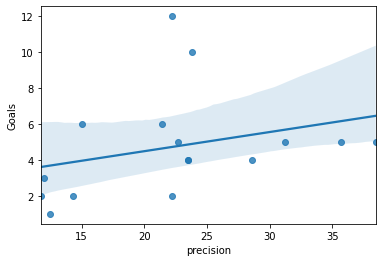

In [19]:
sns.regplot(x='precision',y='Goals', data=df_shooting)

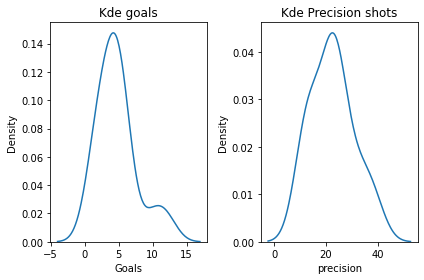

In [20]:
plt.subplot(1,2,1)
sns.kdeplot(x='Goals', data=df_shooting)
plt.title('Kde goals')

plt.subplot(1,2,2)
sns.kdeplot(x='precision', data=df_shooting)
plt.title('Kde Precision shots')

plt.tight_layout()

In [21]:
X = df_shooting['precision'].to_numpy().reshape(-1,1)
y = df_shooting['Goals'].to_numpy().reshape(-1,1)
print(X.shape)
print(y.shape)

(16, 1)
(16, 1)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20,
                                                    random_state = 42)

print('Shape features_train ', X_train.shape)
print('Shape label_train ', y_train.shape)
print('Shape features_test ', X_test.shape)
print('Shape label_train ', y_test.shape)

Shape features_train  (12, 1)
Shape label_train  (12, 1)
Shape features_test  (4, 1)
Shape label_train  (4, 1)


In [23]:
# 2.2.- usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

In [26]:
#Regresión Lineal
lin_reg = LinearRegression()

lin_reg.fit(X,y)
lin_reg_pred = lin_reg.predict(X)

In [40]:
mse = mean_squared_error(y, lin_reg_pred)
print('MSE LinearRegressor',mse)

MSE LinearRegressor 7.103757337639538


Text(0.5, 0, 'precision')

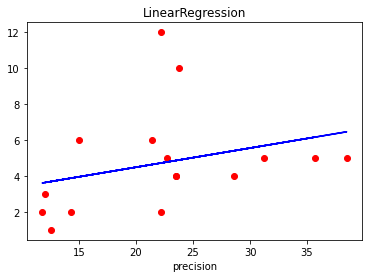

In [28]:
plt.scatter(X, y, color='r')
plt.plot(X, lin_reg_pred, color= 'b')
plt.title('LinearRegression')
plt.xlabel('precision')

In [29]:
#Regresión no Lineal con polinomio
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svm_poly = SVR(kernel='poly')

svm_poly_param = {'degree':[2,3],
                'gamma': ['scale', 'auto'],
                #'coef0':np.arange(0.1,1,0.1),
                'C':[0.1,1,5,50,100]}

grid_svm_poly = GridSearchCV(estimator= svm_poly,
                            param_grid= svm_poly_param,
                            cv = 10,
                            n_jobs = -1,
                            scoring = 'neg_mean_squared_error',
                            verbose = True)
grid_svm_poly.fit(X,y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.5min finished
C:\Users\pilar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 5, 50, 100], 'degree': [2, 3],
                         'gamma': ['scale', 'auto']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=True)

In [30]:
print("Best params:", grid_svm_poly.best_params_)
print("Best score:", grid_svm_poly.best_score_)

Best params: {'C': 1, 'degree': 2, 'gamma': 'auto'}
Best score: -8.52391212723043


In [31]:
svm_poly = SVR(kernel='poly', C= 1, degree=2, gamma='auto')
svm_poly.fit(X,y)
svm_poly_pred = svm_poly.predict(X)
svm_poly_pred

array([3.88520888, 3.88520888, 4.32357205, 4.59096198, 3.20164326,
       3.90733653, 5.42987635, 3.33681007, 3.30190305, 3.19231225,
       3.72759846, 3.22208516, 5.0898238 , 3.78540895, 3.82329198,
       3.78540895])

Text(0.5, 1.0, 'Polynomial_Regresion')

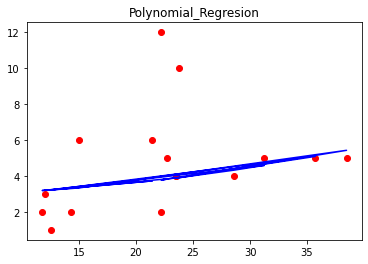

In [32]:
plt.scatter(X,y ,color='red')
plt.plot(X, svm_poly_pred, color='blue')
plt.title('Polynomial_Regresion')

In [39]:
mse_poly =mean_squared_error(y, svm_poly_pred)
print('MSE NoLinear_polynomial ',mse_poly)

MSE NoLinear_polynomial  8.12592999619341


In [35]:
#SVRegressor 

svr = SVR()
svr.fit(X,y)
svr_pred = svr.predict(X)
svr_pred

array([4.09975976, 4.09975976, 4.09961276, 4.89961276, 2.90003166,
       4.11961162, 4.90047567, 4.89630355, 4.05674129, 3.03907091,
       5.6360798 , 2.97946339, 4.90047567, 5.44090748, 4.90003172,
       5.44090748])

In [37]:
mse_svr = mean_squared_error(y,svr_pred)
print('MSE SupportVectorRegressor',mse_svr)

MSE SupportVectorRegressor 6.256182528666084


## 4. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

## 5. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23